In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
import numpy, pandas, sklearn
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Scikit-learn:", sklearn.__version__)

NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1


In [ ]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import sklearn

import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


-------------------------


In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/SIGNATE/Datasets/診断データを使った糖尿病発症予測/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/SIGNATE/Datasets/診断データを使った糖尿病発症予測/test.csv')
sample_sub = pd.read_csv('/content/drive/MyDrive/SIGNATE/Datasets/診断データを使った糖尿病発症予測/sample_submit.csv')
other_df = pd.read_csv('/content/drive/MyDrive/SIGNATE/Datasets/診断データを使った糖尿病発症予測/diabetes.csv')

In [ ]:
test_df.shape

(1919, 9)

In [ ]:
test_df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,398,0,126,80,0,0,40.096264,0.822517,21
1,3833,3,88,60,20,0,39.810590,0.204331,22
2,4836,3,114,76,0,0,33.198760,0.521011,21
3,4572,1,146,74,0,0,26.890259,0.504950,38
4,636,1,123,90,26,140,40.270088,0.800513,28


In [ ]:
print(f"train_df: {train_df.shape}")
print(f"test_df: {test_df.shape}")
print(f"other_df: {other_df.shape}")
print(f"sample_sub: {sample_sub.shape}")

train_df: (2861, 10)
test_df: (1919, 9)
other_df: (768, 9)
sample_sub: (1918, 2)


In [ ]:
other_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
train_df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1
...,...,...,...,...,...,...,...,...,...,...
2856,4859,6,126,88,41,0,39.255880,0.484134,30,0
2857,4931,4,88,74,17,0,33.848723,0.171073,23,0
2858,3264,0,144,88,0,0,26.846832,0.259957,21,1
2859,2607,2,113,74,0,0,33.079021,0.266179,38,1


In [ ]:
# 1. train_df에서 index 컬럼 제거
train_df = train_df.drop(columns=['index'])

# 2. 두 데이터프레임 수직 결합 (행 방향)
train_df = pd.concat([train_df, other_df], ignore_index=True)


train_df.reset_index(drop=True, inplace=True)

train_df.drop_duplicates(inplace=True)

train_df.reset_index(inplace=True)


In [ ]:
train_df.shape

(3629, 10)

In [ ]:
# 중복된 행 개수 확인
num_duplicates = train_df.duplicated().sum()

print(f"🔍 중복된 행의 수: {num_duplicates}")


🔍 중복된 행의 수: 0


In [ ]:
train_df

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,9,125,74,0,0,28.536910,0.444902,45,1
1,1,4,109,80,0,0,28.047673,0.238243,22,0
2,2,4,88,78,39,0,52.371341,0.279471,26,0
3,3,9,125,74,0,0,40.062688,0.203922,45,0
4,4,5,107,78,44,284,52.935068,0.284959,45,1
...,...,...,...,...,...,...,...,...,...,...
3624,3624,10,101,76,48,180,32.900000,0.171000,63,0
3625,3625,2,122,70,27,0,36.800000,0.340000,27,0
3626,3626,5,121,72,23,112,26.200000,0.245000,30,0
3627,3627,1,126,60,0,0,30.100000,0.349000,47,1


In [ ]:
sample_sub.head()

,398,0
0,3833,0
1,4836,0
2,4572,0
3,636,0
4,2545,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3629 non-null   int64  
 1   Pregnancies               3629 non-null   int64  
 2   Glucose                   3629 non-null   int64  
 3   BloodPressure             3629 non-null   int64  
 4   SkinThickness             3629 non-null   int64  
 5   Insulin                   3629 non-null   int64  
 6   BMI                       3629 non-null   float64
 7   DiabetesPedigreeFunction  3629 non-null   float64
 8   Age                       3629 non-null   int64  
 9   Outcome                   3629 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 283.6 KB


In [ ]:
train_df.describe()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000
mean,1814.000000,3.416093,115.267842,68.844861,13.150455,26.186553,34.605114,0.415801,30.086250,0.261505
std,1047.746391,2.959842,23.947029,16.935311,15.166277,72.129693,7.762938,0.289379,9.459978,0.439515
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,907.000000,1.000000,100.000000,64.000000,0.000000,0.000000,28.640943,0.232906,23.000000,0.000000
50%,1814.000000,3.000000,111.000000,70.000000,0.000000,0.000000,33.710308,0.276701,27.000000,0.000000
75%,2721.000000,5.000000,126.000000,78.000000,27.000000,0.000000,39.473711,0.521175,36.000000,1.000000
max,3628.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
train_df.isnull().sum()

,0
index,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
test_df.isnull().sum()

,0
index,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0




*   train, test 데이터셋 둘 다 결측치 없음


---

✅ Outcome 각 값의 개수:
Outcome
0    2680
1     949
Name: count, dtype: int64

✅ Outcome 각 값의 비율:
Outcome
0    0.7385
1    0.2615
Name: proportion, dtype: float64


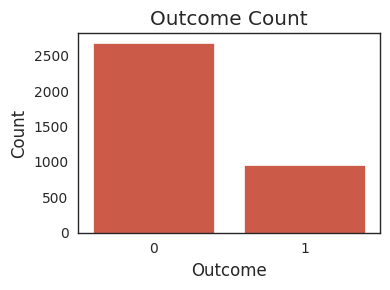

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outcome 값의 절대 수 및 비율 출력
print("✅ Outcome 각 값의 개수:")
print(train_df['Outcome'].value_counts())

print("\n✅ Outcome 각 값의 비율:")
print(train_df['Outcome'].value_counts(normalize=True).round(4))

# 그림 크기 조정
plt.figure(figsize=(4, 3))
sns.countplot(x='Outcome', data=train_df)

plt.title('Outcome Count')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


---

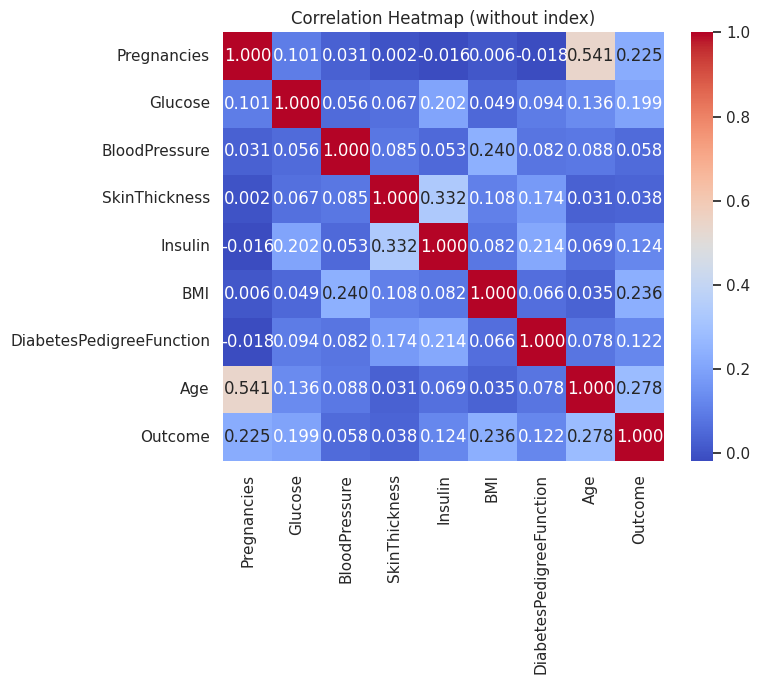

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# index 칼럼을 제외한 상관관계 계산
corr = train_df.drop(columns=["index"]).corr()

# 히트맵 그림 크기 조정
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")

plt.title('Correlation Heatmap (without index)')
plt.tight_layout()
plt.show()



---

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# index 칼럼을 제외한 수치형 컬럼만 선택
columns_to_use = train_df.drop(columns=['index']).select_dtypes(include='number').columns

# pairplot 그리기
sns.pairplot(train_df[columns_to_use], hue='Outcome', plot_kws={'alpha': 0.5}, diag_kind='kde')

plt.suptitle('Pairwise Scatter Plots of Features (without index)', y=1.02)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

---

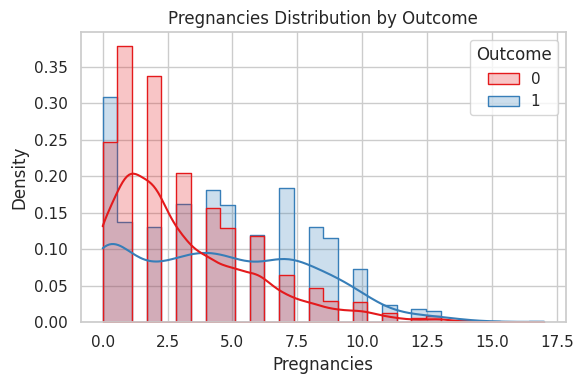

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'Pregnancies'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

np.sort(train_df['Pregnancies'].unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

In [ ]:
train_df[['Pregnancies', 'Outcome']].groupby(['Pregnancies'], as_index=False).mean().sort_values(by='Outcome', ascending=False)


,Pregnancies,Outcome
16,17,1.000000
15,15,1.000000
14,14,1.000000
9,9,0.584906
12,12,0.555556
7,7,0.500000
8,8,0.496454
10,10,0.475610
11,11,0.406250
13,13,0.380952


---

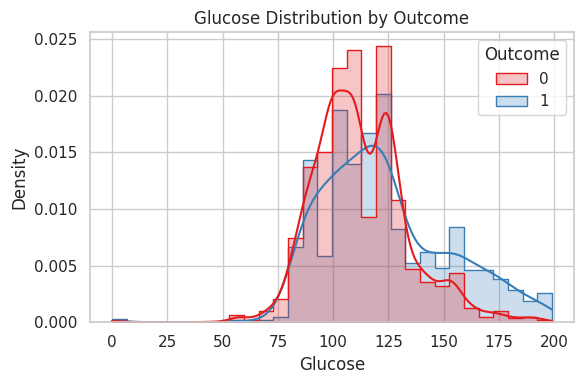

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'Glucose'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

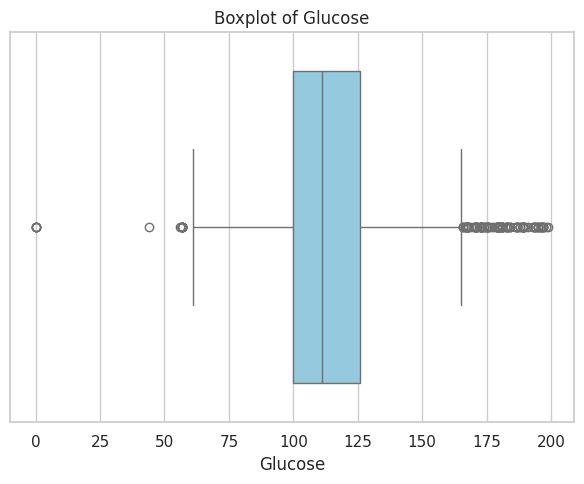

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x=train_df["Glucose"], color='skyblue')

plt.title("Boxplot of Glucose")
plt.xlabel("Glucose")
plt.tight_layout()
plt.show()


In [ ]:
num_zero_glucose = (train_df["Glucose"] == 0).sum()
print(f"🔍 Glucose 값이 0인 행의 수: {num_zero_glucose}")


🔍 Glucose 값이 0인 행의 수: 5


In [ ]:
# 30 이하인 행 수 확인
low_glucose_count = (train_df["Glucose"] <= 30).sum()
print(f"⚠️ Glucose ≤ 30인 행 수: {low_glucose_count}")


⚠️ Glucose ≤ 30인 행 수: 5


---

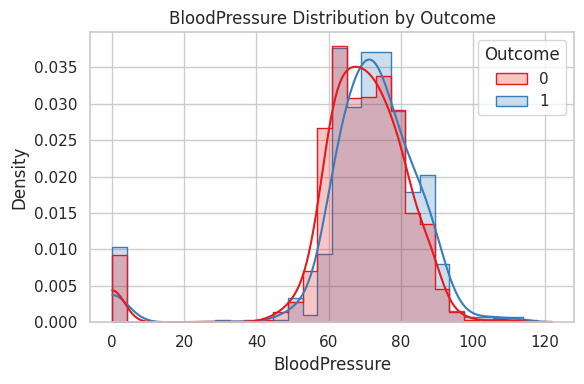

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'BloodPressure'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

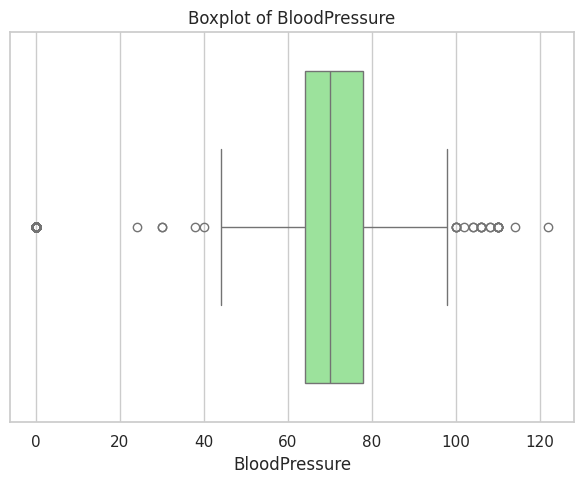

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x=train_df["BloodPressure"], color='lightgreen')

plt.title("Boxplot of BloodPressure")
plt.xlabel("BloodPressure")
plt.tight_layout()
plt.show()


In [ ]:
bp_unique_sorted = train_df['BloodPressure'].drop_duplicates().sort_values()
print(bp_unique_sorted.values)


[  0  24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64
  65  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94
  95  96  98 100 102 104 106 108 110 114 122]


---

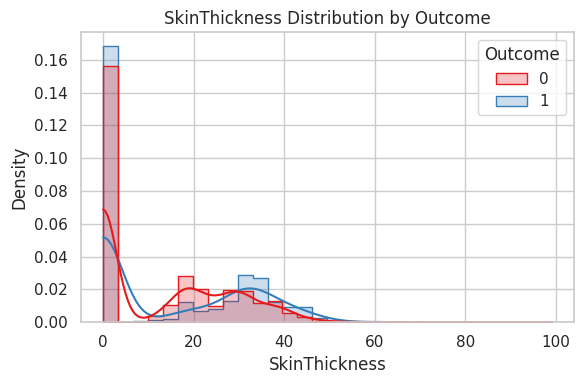

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'SkinThickness'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

np.sort(train_df['SkinThickness'].unique())

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99])

In [ ]:
num_zero_skin = (train_df["SkinThickness"] == 0).sum()
print(f"🔍 SkinThickness가 0인 행의 수: {num_zero_skin}")


🔍 SkinThickness가 0인 행의 수: 1907


---

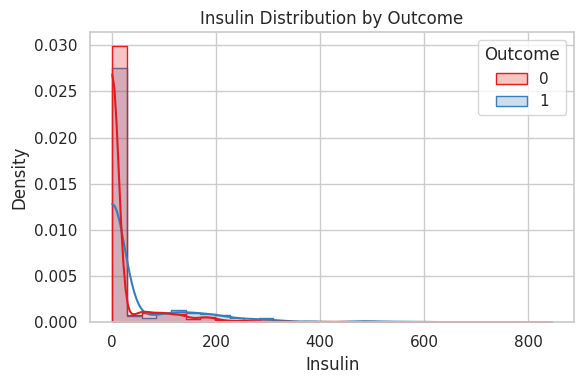

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'Insulin'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# 인슐린 값이 0인 경우의 개수
num_zero_insulin = (train_df['Insulin'] == 0).sum()

# 전체 개수
total_rows = len(train_df)

# 비율 계산
ratio_zero_insulin = num_zero_insulin / total_rows * 100

# 출력
print(f"🔍 Insulin 값이 0인 데이터 개수: {num_zero_insulin}개")
print(f"📉 전체 대비 비율: {ratio_zero_insulin:.2f}%")


🔍 Insulin 값이 0인 데이터 개수: 2988개
📉 전체 대비 비율: 82.34%


---

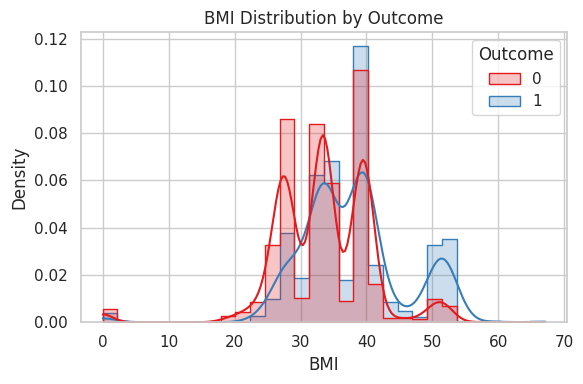

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'BMI'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

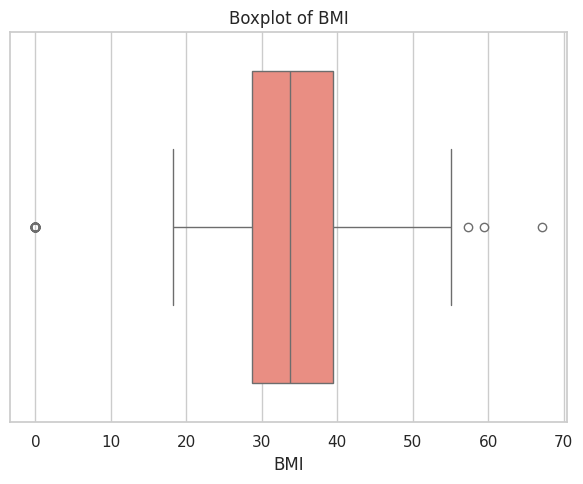

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(x=train_df["BMI"], color='salmon')

plt.title("Boxplot of BMI")
plt.xlabel("BMI")
plt.tight_layout()
plt.show()


In [ ]:
num_bmi_under_5 = (train_df["BMI"] < 5).sum()
print(f"🔍 BMI가 5 미만인 행의 수: {num_bmi_under_5}")

num_bmi_zero = (train_df["BMI"] == 0).sum()
print(f"🔍 BMI가 0인 행의 수: {num_bmi_zero}")


🔍 BMI가 5 미만인 행의 수: 42
🔍 BMI가 0인 행의 수: 11


---

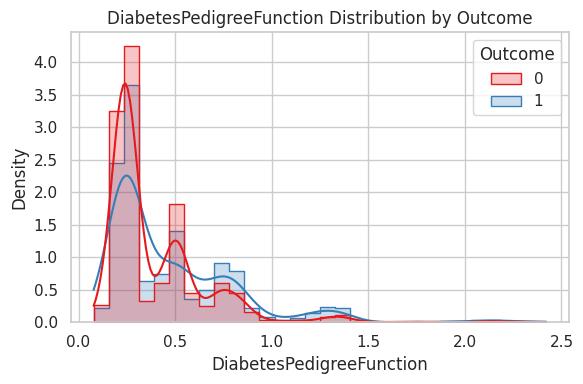

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'DiabetesPedigreeFunction'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

---

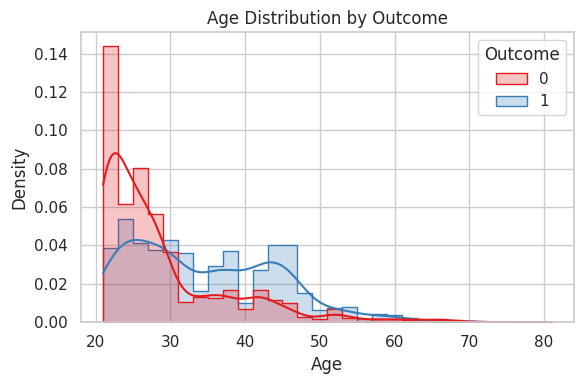

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 분석할 단일 feature 설정
feature = 'Age'

# 분포 시각화
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x=feature, hue='Outcome', kde=True, bins=30,
             palette='Set1', element='step', stat='density', common_norm=False)

plt.title(f'{feature} Distribution by Outcome')
plt.xlabel(feature)
plt.ylabel('Density')
plt.tight_layout()
plt.show()

---

# 1. LightGBM 테스트

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from lightgbm import LGBMClassifier

# 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 데이터 준비

# (1) 원본
X_raw = train_df.drop(columns=["Outcome", "index"])
y = train_df["Outcome"]

# (2) 전처리
df_cleaned = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)
bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)
X_clean = df_cleaned.drop(columns=["Outcome", "index"])
y_clean = df_cleaned["Outcome"]

# (3) Insulin 제거한 원본
X_raw_no_insulin = X_raw.drop(columns=["Insulin"])

# (4) Insulin 제거한 전처리
X_clean_no_insulin = X_clean.drop(columns=["Insulin"])

# ✅ LightGBM Objective
def get_lgb_objective(X, y):
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'binary_logloss',
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            'num_leaves': trial.suggest_int('num_leaves', 5, 256),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'random_state': 42,
            'verbosity': -1,
        }
        model = LGBMClassifier(**params)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        return score.mean()
    return objective

# ✅ 4가지 버전 튜닝 실행
versions = [
    ("원본", X_raw, y),
    ("전처리", X_clean, y_clean),
    ("원본_Insulin제거", X_raw_no_insulin, y),
    ("전처리_Insulin제거", X_clean_no_insulin, y_clean)
]

for name, X_version, y_version in versions:
    print(f"\n🔍 LightGBM 튜닝: {name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(get_lgb_objective(X_version, y_version), n_trials=100)
    print(f"✅ {name} 결과: ACC = {study.best_value:.4f}")
    print("Best params:", study.best_params)



[I 2025-03-26 05:10:51,910] A new study created in memory with name: no-name-16140c58-1827-4cb3-91c6-9fd6d919d67d



🔍 LightGBM 튜닝: 원본


[I 2025-03-26 05:10:53,760] Trial 0 finished with value: 0.7919432902607187 and parameters: {'lambda_l1': 9.709495270927041, 'lambda_l2': 0.0001213144906614711, 'num_leaves': 197, 'max_depth': 8, 'learning_rate': 0.05372868962859109, 'min_child_samples': 73, 'n_estimators': 218, 'colsample_bytree': 0.696257162473331}. Best is trial 0 with value: 0.7919432902607187.
[I 2025-03-26 05:10:57,805] Trial 1 finished with value: 0.7770649742020913 and parameters: {'lambda_l1': 9.516570231835463e-06, 'lambda_l2': 8.910101858655607e-06, 'num_leaves': 154, 'max_depth': 11, 'learning_rate': 0.1627580120434702, 'min_child_samples': 76, 'n_estimators': 496, 'colsample_bytree': 0.740287669484732}. Best is trial 0 with value: 0.7919432902607187.
[I 2025-03-26 05:10:59,495] Trial 2 finished with value: 0.7894647124180022 and parameters: {'lambda_l1': 1.0047975752579286, 'lambda_l2': 1.3809742422059693e-06, 'num_leaves': 19, 'max_depth': 5, 'learning_rate': 0.210336197415849, 'min_child_samples': 83, 'n

✅ 원본 결과: ACC = 0.8027
Best params: {'lambda_l1': 0.04491674009415177, 'lambda_l2': 3.9786076543515723, 'num_leaves': 199, 'max_depth': 4, 'learning_rate': 0.05209038568254827, 'min_child_samples': 19, 'n_estimators': 262, 'colsample_bytree': 0.7611643785681226}

🔍 LightGBM 튜닝: 전처리


[I 2025-03-26 05:15:42,151] Trial 0 finished with value: 0.7850585209198971 and parameters: {'lambda_l1': 6.80218362091836e-06, 'lambda_l2': 0.03470131875396887, 'num_leaves': 235, 'max_depth': 10, 'learning_rate': 0.18830751073481153, 'min_child_samples': 46, 'n_estimators': 289, 'colsample_bytree': 0.9341661626736022}. Best is trial 0 with value: 0.7850585209198971.
[I 2025-03-26 05:15:45,901] Trial 1 finished with value: 0.7861558832930002 and parameters: {'lambda_l1': 2.512247371000687e-07, 'lambda_l2': 1.0682778855137278e-08, 'num_leaves': 202, 'max_depth': 5, 'learning_rate': 0.11382262579888294, 'min_child_samples': 12, 'n_estimators': 514, 'colsample_bytree': 0.6161558823235176}. Best is trial 1 with value: 0.7861558832930002.
[I 2025-03-26 05:15:52,059] Trial 2 finished with value: 0.7723764516079935 and parameters: {'lambda_l1': 4.555436363075339e-07, 'lambda_l2': 0.027852537572452894, 'num_leaves': 158, 'max_depth': 10, 'learning_rate': 0.2976564623814982, 'min_child_samples

✅ 전처리 결과: ACC = 0.8016
Best params: {'lambda_l1': 1.5974754723900856e-07, 'lambda_l2': 2.170085981920932, 'num_leaves': 138, 'max_depth': 4, 'learning_rate': 0.03217297198826421, 'min_child_samples': 19, 'n_estimators': 529, 'colsample_bytree': 0.8868544959315378}

🔍 LightGBM 튜닝: 원본_Insulin제거


[I 2025-03-26 05:21:41,903] Trial 0 finished with value: 0.7803692373255406 and parameters: {'lambda_l1': 1.4320117110298036e-07, 'lambda_l2': 1.7738171296700713e-06, 'num_leaves': 21, 'max_depth': 11, 'learning_rate': 0.22113066037103443, 'min_child_samples': 55, 'n_estimators': 777, 'colsample_bytree': 0.5641114560890763}. Best is trial 0 with value: 0.7803692373255406.
[I 2025-03-26 05:21:46,096] Trial 1 finished with value: 0.7847807558254569 and parameters: {'lambda_l1': 0.8219109043776072, 'lambda_l2': 5.71896868570627e-06, 'num_leaves': 170, 'max_depth': 9, 'learning_rate': 0.18033873845058898, 'min_child_samples': 56, 'n_estimators': 675, 'colsample_bytree': 0.536772714611192}. Best is trial 1 with value: 0.7847807558254569.
[I 2025-03-26 05:21:56,020] Trial 2 finished with value: 0.7770619302010562 and parameters: {'lambda_l1': 0.011228123420172216, 'lambda_l2': 0.005201199841654901, 'num_leaves': 222, 'max_depth': 12, 'learning_rate': 0.120673227351288, 'min_child_samples': 8

✅ 원본_Insulin제거 결과: ACC = 0.8021
Best params: {'lambda_l1': 1.9145344510500522, 'lambda_l2': 1.097394893663845e-08, 'num_leaves': 55, 'max_depth': 3, 'learning_rate': 0.03458925308064574, 'min_child_samples': 49, 'n_estimators': 844, 'colsample_bytree': 0.7194960014694305}

🔍 LightGBM 튜닝: 전처리_Insulin제거


[I 2025-03-26 05:26:37,337] Trial 0 finished with value: 0.777341217296014 and parameters: {'lambda_l1': 1.0003459662201794e-05, 'lambda_l2': 8.473544005050982e-05, 'num_leaves': 157, 'max_depth': 12, 'learning_rate': 0.16056545164773348, 'min_child_samples': 46, 'n_estimators': 249, 'colsample_bytree': 0.8283416162137698}. Best is trial 0 with value: 0.777341217296014.
[I 2025-03-26 05:26:42,787] Trial 1 finished with value: 0.7869815685737332 and parameters: {'lambda_l1': 4.656783224787624e-07, 'lambda_l2': 0.00018788555458234646, 'num_leaves': 245, 'max_depth': 8, 'learning_rate': 0.09632190915677863, 'min_child_samples': 45, 'n_estimators': 699, 'colsample_bytree': 0.8551621707754704}. Best is trial 1 with value: 0.7869815685737332.
[I 2025-03-26 05:26:45,319] Trial 2 finished with value: 0.7880888239502001 and parameters: {'lambda_l1': 0.05488785086060318, 'lambda_l2': 5.0655765447860714, 'num_leaves': 237, 'max_depth': 3, 'learning_rate': 0.29311592894735183, 'min_child_samples':

✅ 전처리_Insulin제거 결과: ACC = 0.8021
Best params: {'lambda_l1': 7.337377872313484, 'lambda_l2': 8.143919558818871e-06, 'num_leaves': 217, 'max_depth': 12, 'learning_rate': 0.05694894453433025, 'min_child_samples': 20, 'n_estimators': 184, 'colsample_bytree': 0.7216924803245229}


# 2. XGBoost 테스트

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBClassifier

# 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 데이터 준비

# (1) 원본
X_raw = train_df.drop(columns=["Outcome", "index"])
y = train_df["Outcome"]

# (2) 전처리
df_cleaned = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)
bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)
X_clean = df_cleaned.drop(columns=["Outcome", "index"])
y_clean = df_cleaned["Outcome"]

# (3) Insulin 제거한 원본
X_raw_no_insulin = X_raw.drop(columns=["Insulin"])

# (4) Insulin 제거한 전처리
X_clean_no_insulin = X_clean.drop(columns=["Insulin"])

# ✅ XGBoost Objective
def get_xgb_objective(X, y):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'random_state': 42,
            'use_label_encoder': False,
            'eval_metric': 'logloss'
        }
        model = XGBClassifier(**params)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        return score.mean()
    return objective

# ✅ 4가지 버전 튜닝 실행
versions = [
    ("원본", X_raw, y),
    ("전처리", X_clean, y_clean),
    ("원본_Insulin제거", X_raw_no_insulin, y),
    ("전처리_Insulin제거", X_clean_no_insulin, y_clean)
]

for name, X_version, y_version in versions:
    print(f"\n🔍 XGBoost 튜닝: {name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(get_xgb_objective(X_version, y_version), n_trials=100)
    print(f"✅ {name} 결과: ACC = {study.best_value:.4f}")
    print("Best params:", study.best_params)


[I 2025-03-26 05:31:45,872] A new study created in memory with name: no-name-e3ec96f2-7b53-40c2-aa74-4e52b34ec360



🔍 XGBoost 튜닝: 원본


[I 2025-03-26 05:31:46,863] Trial 0 finished with value: 0.7974544541345144 and parameters: {'n_estimators': 220, 'learning_rate': 0.18526204094392693, 'max_depth': 12, 'subsample': 0.6259130162914891, 'colsample_bytree': 0.5565482660787313, 'gamma': 3.53544290922141}. Best is trial 0 with value: 0.7974544541345144.
[I 2025-03-26 05:31:52,088] Trial 1 finished with value: 0.7941494300108062 and parameters: {'n_estimators': 915, 'learning_rate': 0.18008591930314938, 'max_depth': 6, 'subsample': 0.8134403053967034, 'colsample_bytree': 0.992166542622013, 'gamma': 4.03486816822593}. Best is trial 0 with value: 0.7974544541345144.
[I 2025-03-26 05:31:56,731] Trial 2 finished with value: 0.8013073984445155 and parameters: {'n_estimators': 792, 'learning_rate': 0.025714354065876348, 'max_depth': 5, 'subsample': 0.8564365857582121, 'colsample_bytree': 0.6279878073170655, 'gamma': 0.9925350302631714}. Best is trial 2 with value: 0.8013073984445155.
[I 2025-03-26 05:32:00,813] Trial 3 finished w

✅ 원본 결과: ACC = 0.8082
Best params: {'n_estimators': 901, 'learning_rate': 0.07941475371335394, 'max_depth': 5, 'subsample': 0.8839155895237216, 'colsample_bytree': 0.5670420382854219, 'gamma': 2.6940534803158336}

🔍 XGBoost 튜닝: 전처리


[I 2025-03-26 05:37:29,732] Trial 0 finished with value: 0.7935946608221847 and parameters: {'n_estimators': 525, 'learning_rate': 0.04361535392959314, 'max_depth': 8, 'subsample': 0.775358884435319, 'colsample_bytree': 0.9382066961787481, 'gamma': 4.651907015792091}. Best is trial 0 with value: 0.7935946608221847.
[I 2025-03-26 05:37:32,273] Trial 1 finished with value: 0.798828820601799 and parameters: {'n_estimators': 849, 'learning_rate': 0.09917639698828007, 'max_depth': 5, 'subsample': 0.8730662989976794, 'colsample_bytree': 0.6522731827901254, 'gamma': 2.1344078041817536}. Best is trial 1 with value: 0.798828820601799.
[I 2025-03-26 05:37:34,839] Trial 2 finished with value: 0.7974491271327032 and parameters: {'n_estimators': 778, 'learning_rate': 0.0857052530244824, 'max_depth': 6, 'subsample': 0.7585304846662696, 'colsample_bytree': 0.8805695197259339, 'gamma': 3.8041165932448893}. Best is trial 1 with value: 0.798828820601799.
[I 2025-03-26 05:37:36,366] Trial 3 finished with

✅ 전처리 결과: ACC = 0.8071
Best params: {'n_estimators': 291, 'learning_rate': 0.07644667333320183, 'max_depth': 7, 'subsample': 0.7880074362176137, 'colsample_bytree': 0.584586950238223, 'gamma': 1.6950457722336263}

🔍 XGBoost 튜닝: 원본_Insulin제거


[I 2025-03-26 05:42:56,663] Trial 0 finished with value: 0.7993851117909381 and parameters: {'n_estimators': 168, 'learning_rate': 0.09477147123604843, 'max_depth': 7, 'subsample': 0.7465875053338028, 'colsample_bytree': 0.5887525565693097, 'gamma': 4.312204497429938}. Best is trial 0 with value: 0.7993851117909381.
[I 2025-03-26 05:42:58,189] Trial 1 finished with value: 0.7947019161986515 and parameters: {'n_estimators': 553, 'learning_rate': 0.18631252034329365, 'max_depth': 9, 'subsample': 0.8556617787220113, 'colsample_bytree': 0.6033181885753675, 'gamma': 4.660603535200873}. Best is trial 0 with value: 0.7993851117909381.
[I 2025-03-26 05:43:00,415] Trial 2 finished with value: 0.8004893231663699 and parameters: {'n_estimators': 634, 'learning_rate': 0.11101208811596434, 'max_depth': 5, 'subsample': 0.838668327596114, 'colsample_bytree': 0.5514181258657731, 'gamma': 1.1582705754425227}. Best is trial 2 with value: 0.8004893231663699.
[I 2025-03-26 05:43:02,846] Trial 3 finished w

✅ 원본_Insulin제거 결과: ACC = 0.8065
Best params: {'n_estimators': 696, 'learning_rate': 0.07088618507651681, 'max_depth': 4, 'subsample': 0.8707341884495821, 'colsample_bytree': 0.6791863165961124, 'gamma': 2.0954349781007977}

🔍 XGBoost 튜닝: 전처리_Insulin제거


[I 2025-03-26 05:50:44,101] Trial 0 finished with value: 0.7982816614157648 and parameters: {'n_estimators': 871, 'learning_rate': 0.16929414568764, 'max_depth': 9, 'subsample': 0.9840985815458698, 'colsample_bytree': 0.8428193196546936, 'gamma': 1.262675685712732}. Best is trial 0 with value: 0.7982816614157648.
[I 2025-03-26 05:50:45,980] Trial 1 finished with value: 0.7982816614157648 and parameters: {'n_estimators': 592, 'learning_rate': 0.25166415901912137, 'max_depth': 10, 'subsample': 0.953548456496925, 'colsample_bytree': 0.6564527620127392, 'gamma': 1.4683513034741975}. Best is trial 0 with value: 0.7982816614157648.
[I 2025-03-26 05:50:49,559] Trial 2 finished with value: 0.7919417682602012 and parameters: {'n_estimators': 359, 'learning_rate': 0.2032947402817939, 'max_depth': 3, 'subsample': 0.7845723078921227, 'colsample_bytree': 0.9495020478207783, 'gamma': 4.626362617795105}. Best is trial 0 with value: 0.7982816614157648.
[I 2025-03-26 05:50:51,610] Trial 3 finished with

✅ 전처리_Insulin제거 결과: ACC = 0.8074
Best params: {'n_estimators': 945, 'learning_rate': 0.02330021609708931, 'max_depth': 7, 'subsample': 0.9085700418247236, 'colsample_bytree': 0.589799080424217, 'gamma': 1.6628612387594126}


# 3. KNN 테스트

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 데이터 준비
X_raw = train_df.drop(columns=["Outcome", "index"])
y = train_df["Outcome"]

df_cleaned = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)
bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)
X_clean = df_cleaned.drop(columns=["Outcome", "index"])
y_clean = df_cleaned["Outcome"]

X_raw_no_insulin = X_raw.drop(columns=["Insulin"])
X_clean_no_insulin = X_clean.drop(columns=["Insulin"])

versions = [
    ("원본", X_raw, y),
    ("전처리", X_clean, y_clean),
    ("원본_Insulin제거", X_raw_no_insulin, y),
    ("전처리_Insulin제거", X_clean_no_insulin, y_clean)
]

# ✅ KNN Objective
def get_knn_objective(X, y):
    def objective(trial):
        model = make_pipeline(
            StandardScaler(),
            KNeighborsClassifier(
                n_neighbors=trial.suggest_int("n_neighbors", 3, 20),
                weights=trial.suggest_categorical("weights", ["uniform", "distance"]),
                p=trial.suggest_int("p", 1, 2)
            )
        )
        return cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
    return objective

for name, X_version, y_version in versions:
    print(f"\n🔍 KNN 튜닝: {name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(get_knn_objective(X_version, y_version), n_trials=100)
    print(f"✅ {name} 결과: ACC = {study.best_value:.4f}")
    print("Best params:", study.best_params)


[I 2025-03-26 06:04:21,581] A new study created in memory with name: no-name-2d8d7f44-918e-4367-ba40-9bc0641bc37b



🔍 KNN 튜닝: 원본


[I 2025-03-26 06:04:22,093] Trial 0 finished with value: 0.7660487344565697 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7660487344565697.
[I 2025-03-26 06:04:22,355] Trial 1 finished with value: 0.7530980320533309 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7660487344565697.
[I 2025-03-26 06:04:22,685] Trial 2 finished with value: 0.7690790374868727 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 0.7690790374868727.
[I 2025-03-26 06:04:22,963] Trial 3 finished with value: 0.7621942681460511 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.7690790374868727.
[I 2025-03-26 06:04:23,427] Trial 4 finished with value: 0.7533666651446663 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.7690790374868727.
[I 2025-03-26 06:04:23,687] Trial 5 finished

✅ 원본 결과: ACC = 0.7779
Best params: {'n_neighbors': 19, 'weights': 'uniform', 'p': 1}

🔍 KNN 튜닝: 전처리


[I 2025-03-26 06:05:17,420] Trial 0 finished with value: 0.7682510692053636 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7682510692053636.
[I 2025-03-26 06:05:17,898] Trial 1 finished with value: 0.750064685021993 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7682510692053636.
[I 2025-03-26 06:05:18,247] Trial 2 finished with value: 0.7676978220172594 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 1}. Best is trial 0 with value: 0.7682510692053636.
[I 2025-03-26 06:05:18,758] Trial 3 finished with value: 0.7624659452384214 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7682510692053636.
[I 2025-03-26 06:05:19,259] Trial 4 finished with value: 0.7638357457041536 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7682510692053636.
[I 2025-03-26 06:05:19,549] Trial 5 finished wi

✅ 전처리 결과: ACC = 0.7746
Best params: {'n_neighbors': 15, 'weights': 'distance', 'p': 1}

🔍 KNN 튜닝: 원본_Insulin제거


[I 2025-03-26 06:06:12,259] Trial 0 finished with value: 0.7690813204876491 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.7690813204876491.
[I 2025-03-26 06:06:12,563] Trial 1 finished with value: 0.7721078185166583 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.7721078185166583.
[I 2025-03-26 06:06:13,190] Trial 2 finished with value: 0.7619134590505761 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.7721078185166583.
[I 2025-03-26 06:06:13,960] Trial 3 finished with value: 0.7765162930155396 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.7765162930155396.
[I 2025-03-26 06:06:14,598] Trial 4 finished with value: 0.7484064654581982 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 1}. Best is trial 3 with value: 0.7765162930155396.
[I 2025-03-26 06:06:15,333] Trial 5 finished w

✅ 원본_Insulin제거 결과: ACC = 0.7765
Best params: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}

🔍 KNN 튜닝: 전처리_Insulin제거


[I 2025-03-26 06:07:11,303] Trial 0 finished with value: 0.7638463997077759 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7638463997077759.
[I 2025-03-26 06:07:11,632] Trial 1 finished with value: 0.7710020851407089 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.7710020851407089.
[I 2025-03-26 06:07:11,949] Trial 2 finished with value: 0.7688020333926914 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'p': 1}. Best is trial 1 with value: 0.7710020851407089.
[I 2025-03-26 06:07:12,512] Trial 3 finished with value: 0.7682487862045873 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.7710020851407089.
[I 2025-03-26 06:07:13,239] Trial 4 finished with value: 0.7707304080483387 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'p': 1}. Best is trial 1 with value: 0.7710020851407089.
[I 2025-03-26 06:07:13,853] Trial 5 finishe

✅ 전처리_Insulin제거 결과: ACC = 0.7765
Best params: {'n_neighbors': 20, 'weights': 'uniform', 'p': 1}


# 4. SVC 테스트

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 데이터 준비
X_raw = train_df.drop(columns=["Outcome", "index"])
y = train_df["Outcome"]

df_cleaned = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)
bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)
X_clean = df_cleaned.drop(columns=["Outcome", "index"])
y_clean = df_cleaned["Outcome"]

X_raw_no_insulin = X_raw.drop(columns=["Insulin"])
X_clean_no_insulin = X_clean.drop(columns=["Insulin"])

versions = [
    ("원본", X_raw, y),
    ("전처리", X_clean, y_clean),
    ("원본_Insulin제거", X_raw_no_insulin, y),
    ("전처리_Insulin제거", X_clean_no_insulin, y_clean)
]

# ✅ SVC Objective (gamma를 실수 값으로 조정)
def get_svc_objective(X, y):
    def objective(trial):
        model = make_pipeline(
            StandardScaler(),
            SVC(
                C=trial.suggest_float("C", 0.1, 10.0, log=True),
                kernel=trial.suggest_categorical("kernel", ["linear", "rbf"]),
                gamma=trial.suggest_float("gamma", 1e-4, 10.0, log=True),
                probability=True,
                random_state=42
            )
        )
        return cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
    return objective

for name, X_version, y_version in versions:
    print(f"\n🔍 SVC 튜닝: {name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(get_svc_objective(X_version, y_version), n_trials=50)
    print(f"✅ {name} 결과: ACC = {study.best_value:.4f}")
    print("Best params:", study.best_params)



[I 2025-03-26 06:18:02,957] A new study created in memory with name: no-name-459bb712-ba94-49ff-bcd0-111b8e756450



🔍 SVC 튜닝: 원본


[I 2025-03-26 06:18:25,019] Trial 0 finished with value: 0.7743093922651934 and parameters: {'C': 1.1220841642242128, 'kernel': 'rbf', 'gamma': 0.14549911876963548}. Best is trial 0 with value: 0.7743093922651934.
[I 2025-03-26 06:18:40,173] Trial 1 finished with value: 0.7384959590886261 and parameters: {'C': 1.8506080455490346, 'kernel': 'rbf', 'gamma': 0.00014550870679041586}. Best is trial 0 with value: 0.7743093922651934.
[I 2025-03-26 06:18:57,824] Trial 2 finished with value: 0.7503432111166918 and parameters: {'C': 0.8033919679562456, 'kernel': 'linear', 'gamma': 0.0007050141789630848}. Best is trial 0 with value: 0.7743093922651934.
[I 2025-03-26 06:19:12,764] Trial 3 finished with value: 0.7503432111166918 and parameters: {'C': 0.3977164574774184, 'kernel': 'linear', 'gamma': 0.06900283238422054}. Best is trial 0 with value: 0.7743093922651934.
[I 2025-03-26 06:19:28,309] Trial 4 finished with value: 0.7384959590886261 and parameters: {'C': 0.28434091902487546, 'kernel': 'rbf

✅ 원본 결과: ACC = 0.7757
Best params: {'C': 2.636096283994162, 'kernel': 'rbf', 'gamma': 0.06848559764445616}

🔍 SVC 튜닝: 전처리


[I 2025-03-26 06:35:00,751] Trial 0 finished with value: 0.7561290960838927 and parameters: {'C': 0.1628418096201636, 'kernel': 'rbf', 'gamma': 0.04417535364430463}. Best is trial 0 with value: 0.7561290960838927.
[I 2025-03-26 06:35:20,968] Trial 1 finished with value: 0.7536459522396238 and parameters: {'C': 0.894591877369356, 'kernel': 'linear', 'gamma': 5.417728127533169}. Best is trial 0 with value: 0.7561290960838927.
[I 2025-03-26 06:35:57,922] Trial 2 finished with value: 0.7536451912393651 and parameters: {'C': 4.275593984179964, 'kernel': 'linear', 'gamma': 0.050804904675426116}. Best is trial 0 with value: 0.7561290960838927.
[I 2025-03-26 06:36:13,671] Trial 3 finished with value: 0.7536459522396238 and parameters: {'C': 0.4168060896230629, 'kernel': 'linear', 'gamma': 0.06525475044031978}. Best is trial 0 with value: 0.7561290960838927.
[I 2025-03-26 06:36:31,518] Trial 4 finished with value: 0.7536459522396238 and parameters: {'C': 0.521345049488907, 'kernel': 'linear', '

✅ 전처리 결과: ACC = 0.7735
Best params: {'C': 5.609591197720283, 'kernel': 'rbf', 'gamma': 0.05242604836974376}

🔍 SVC 튜닝: 원본_Insulin제거


[I 2025-03-26 06:51:41,718] Trial 0 finished with value: 0.7387691581815139 and parameters: {'C': 0.7228466392714449, 'kernel': 'linear', 'gamma': 0.030418646509860245}. Best is trial 0 with value: 0.7387691581815139.
[I 2025-03-26 06:52:08,470] Trial 1 finished with value: 0.7393208833691004 and parameters: {'C': 3.6731923378898177, 'kernel': 'linear', 'gamma': 0.0001981602949709337}. Best is trial 1 with value: 0.7393208833691004.
[I 2025-03-26 06:52:29,832] Trial 2 finished with value: 0.7743116752659696 and parameters: {'C': 3.5171792534411686, 'kernel': 'rbf', 'gamma': 0.12979214333511888}. Best is trial 2 with value: 0.7743116752659696.
[I 2025-03-26 06:52:44,802] Trial 3 finished with value: 0.7632939135199306 and parameters: {'C': 0.4250121039127448, 'kernel': 'rbf', 'gamma': 0.035540044171917126}. Best is trial 2 with value: 0.7743116752659696.
[I 2025-03-26 06:53:03,212] Trial 4 finished with value: 0.7390454012754365 and parameters: {'C': 1.648567232775621, 'kernel': 'linear

✅ 원본_Insulin제거 결과: ACC = 0.7760
Best params: {'C': 0.5941053362721552, 'kernel': 'rbf', 'gamma': 0.18293270860355085}

🔍 SVC 튜닝: 전처리_Insulin제거


[I 2025-03-26 07:07:47,690] Trial 0 finished with value: 0.7478600672724229 and parameters: {'C': 1.5714106376362773, 'kernel': 'linear', 'gamma': 0.0025314026176109956}. Best is trial 0 with value: 0.7478600672724229.
[I 2025-03-26 07:07:59,282] Trial 1 finished with value: 0.7484110314597507 and parameters: {'C': 0.11950038912028813, 'kernel': 'linear', 'gamma': 0.008502344312917869}. Best is trial 1 with value: 0.7484110314597507.
[I 2025-03-26 07:08:25,349] Trial 2 finished with value: 0.7384959590886261 and parameters: {'C': 0.12852550900138685, 'kernel': 'rbf', 'gamma': 3.2661458662200165}. Best is trial 1 with value: 0.7484110314597507.
[I 2025-03-26 07:08:39,330] Trial 3 finished with value: 0.7484110314597507 and parameters: {'C': 0.4557548980776176, 'kernel': 'linear', 'gamma': 0.0009265015426515836}. Best is trial 1 with value: 0.7484110314597507.
[I 2025-03-26 07:08:57,241] Trial 4 finished with value: 0.7715545713285542 and parameters: {'C': 1.3422953367842116, 'kernel': '

✅ 전처리_Insulin제거 결과: ACC = 0.7749
Best params: {'C': 1.4590647420302503, 'kernel': 'rbf', 'gamma': 0.09217705796456636}


# 5. Logistic regression 테스트

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 데이터 준비
X_raw = train_df.drop(columns=["Outcome", "index"])
y = train_df["Outcome"]

df_cleaned = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)
bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)
X_clean = df_cleaned.drop(columns=["Outcome", "index"])
y_clean = df_cleaned["Outcome"]

X_raw_no_insulin = X_raw.drop(columns=["Insulin"])
X_clean_no_insulin = X_clean.drop(columns=["Insulin"])

versions = [
    ("원본", X_raw, y),
    ("전처리", X_clean, y_clean),
    ("원본_Insulin제거", X_raw_no_insulin, y),
    ("전처리_Insulin제거", X_clean_no_insulin, y_clean)
]

# ✅ LogReg Objective
def get_logreg_objective(X, y):
    def objective(trial):
        penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
        solver = trial.suggest_categorical("solver", ["liblinear", "saga"])

        if penalty == "l1" and solver not in ["liblinear", "saga"]:
            raise optuna.exceptions.TrialPruned()
        if penalty == "elasticnet" and solver != "saga":
            raise optuna.exceptions.TrialPruned()

        C = trial.suggest_float("C", 1e-4, 10.0, log=True)
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0) if penalty == "elasticnet" else None

        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(
                penalty=penalty,
                solver=solver,
                C=C,
                l1_ratio=l1_ratio,
                max_iter=1000,
                random_state=42
            )
        )
        return cross_val_score(model, X, y, cv=cv, scoring=scorer).mean()
    return objective

for name, X_version, y_version in versions:
    print(f"\n🔍 Logistic Regression 튜닝: {name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(get_logreg_objective(X_version, y_version), n_trials=100)
    print(f"✅ {name} 결과: ACC = {study.best_value:.4f}")
    print("Best params:", study.best_params)


[I 2025-03-26 07:23:34,319] A new study created in memory with name: no-name-2b3b9615-5457-4020-866d-a8bc0ddde89b



🔍 Logistic Regression 튜닝: 원본


[I 2025-03-26 07:23:34,454] Trial 0 finished with value: 0.764940718079844 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.0004942638597193994}. Best is trial 0 with value: 0.764940718079844.
[I 2025-03-26 07:23:34,576] Trial 1 finished with value: 0.7652169611737667 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 2.934469643296071}. Best is trial 1 with value: 0.7652169611737667.
[I 2025-03-26 07:23:34,733] Trial 2 finished with value: 0.7384959590886261 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.00025679071810963384, 'l1_ratio': 0.7601089121721953}. Best is trial 1 with value: 0.7652169611737667.
[I 2025-03-26 07:23:35,020] Trial 3 finished with value: 0.7652177221740255 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.2822886131323887}. Best is trial 3 with value: 0.7652177221740255.
[I 2025-03-26 07:23:35,222] Trial 4 finished with value: 0.7652169611737667 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 5.555

✅ 원본 결과: ACC = 0.7691
Best params: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.048141986333138015, 'l1_ratio': 0.7045834161683003}

🔍 Logistic Regression 튜닝: 전처리


[I 2025-03-26 07:23:57,601] Trial 2 finished with value: 0.7682480252043287 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.019622906297026375}. Best is trial 2 with value: 0.7682480252043287.
[I 2025-03-26 07:23:57,811] Trial 3 finished with value: 0.7687982283913977 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 2.4803038159725466}. Best is trial 3 with value: 0.7687982283913977.
[I 2025-03-26 07:23:58,208] Trial 4 finished with value: 0.7685227462977338 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 4.273610704136649, 'l1_ratio': 0.13425130228664517}. Best is trial 3 with value: 0.7687982283913977.
[I 2025-03-26 07:23:58,470] Trial 5 finished with value: 0.7687982283913977 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.8676385471339272, 'l1_ratio': 0.4696139421015141}. Best is trial 3 with value: 0.7687982283913977.
[I 2025-03-26 07:23:58,669] Trial 6 finished with value: 0.7497930079296227 and parameters: {'penalt

✅ 전처리 결과: ACC = 0.7696
Best params: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.9885202606680275}

🔍 Logistic Regression 튜닝: 원본_Insulin제거


[I 2025-03-26 07:24:12,711] Trial 2 finished with value: 0.7654939652679481 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 7.310007591872575, 'l1_ratio': 0.24031596910948083}. Best is trial 2 with value: 0.7654939652679481.
[I 2025-03-26 07:24:12,814] Trial 3 finished with value: 0.7384959590886261 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.0001771719506935095}. Best is trial 2 with value: 0.7654939652679481.
[I 2025-03-26 07:24:13,022] Trial 4 finished with value: 0.7481385933671217 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0017815248755752885, 'l1_ratio': 0.12008441755357102}. Best is trial 2 with value: 0.7654939652679481.
[I 2025-03-26 07:24:13,216] Trial 5 finished with value: 0.7652184831742842 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.6476926158694883}. Best is trial 2 with value: 0.7654939652679481.
[I 2025-03-26 07:24:13,217] Trial 6 pruned. 
[I 2025-03-26 07:24:13,421] Trial 7 finished with value

✅ 원본_Insulin제거 결과: ACC = 0.7658
Best params: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.5923713076399906}

🔍 Logistic Regression 튜닝: 전처리_Insulin제거


[I 2025-03-26 07:24:32,356] Trial 0 finished with value: 0.739046923275954 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0003393005297297059}. Best is trial 0 with value: 0.739046923275954.
[I 2025-03-26 07:24:32,471] Trial 1 finished with value: 0.7605337655814802 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.00030310785560099435}. Best is trial 1 with value: 0.7605337655814802.
[I 2025-03-26 07:24:32,662] Trial 2 finished with value: 0.7679733041109233 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.9058278120325581}. Best is trial 2 with value: 0.7679733041109233.
[I 2025-03-26 07:24:32,803] Trial 3 finished with value: 0.7674223399235955 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'C': 0.18320944282627472}. Best is trial 2 with value: 0.7679733041109233.
[I 2025-03-26 07:24:33,014] Trial 4 finished with value: 0.7608115306759204 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.012404798624291861, 'l1_ratio': 0

✅ 전처리_Insulin제거 결과: ACC = 0.7685
Best params: {'penalty': 'l1', 'solver': 'liblinear', 'C': 2.157977109116721}


---

In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBClassifier

# ✅ 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 전처리 + 파생 변수 추가
df_cleaned = train_df.copy()

for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)

bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)

# ✅ 파생 변수 추가
df_cleaned["N0"] = df_cleaned["BMI"] * df_cleaned["SkinThickness"]
df_cleaned["N8"] = df_cleaned["Pregnancies"] / df_cleaned["Age"]
df_cleaned["N13"] = df_cleaned["Glucose"] / df_cleaned["DiabetesPedigreeFunction"]
df_cleaned["N12"] = df_cleaned["Age"] * df_cleaned["DiabetesPedigreeFunction"]
df_cleaned["N14"] = df_cleaned["Age"] / df_cleaned["Insulin"]

X = df_cleaned.drop(columns=["Outcome", "index"])
y = df_cleaned["Outcome"]

# ✅ Optuna 목적 함수 정의
def get_xgb_objective(X, y):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'random_state': 42,
            'use_label_encoder': False,
            'eval_metric': 'logloss'
        }
        model = XGBClassifier(**params)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        return score.mean()
    return objective

# ✅ 튜닝 실행 (전처리 + 파생 변수 버전)
print(f"\n🔍 XGBoost 튜닝: 전처리 + 파생 변수")
study = optuna.create_study(direction='maximize')
study.optimize(get_xgb_objective(X, y), n_trials=100)
print(f"✅ 최종 결과: ACC = {study.best_value:.4f}")
print("Best params:", study.best_params)


[I 2025-03-27 05:51:52,558] A new study created in memory with name: no-name-8d4366dc-c49b-4985-a2df-eeb1e13155f7



🔍 XGBoost 튜닝: 전처리 + 파생 변수


[I 2025-03-27 05:51:57,257] Trial 0 finished with value: 0.7908451668873568 and parameters: {'n_estimators': 515, 'learning_rate': 0.20329315886190807, 'max_depth': 4, 'subsample': 0.9633916308721219, 'colsample_bytree': 0.9681019233903193, 'gamma': 2.11909714614716}. Best is trial 0 with value: 0.7908451668873568.
[I 2025-03-27 05:51:59,053] Trial 1 finished with value: 0.7867083694808457 and parameters: {'n_estimators': 229, 'learning_rate': 0.16654792797358056, 'max_depth': 10, 'subsample': 0.7737549858486543, 'colsample_bytree': 0.7542207387423225, 'gamma': 2.0538188221026528}. Best is trial 0 with value: 0.7908451668873568.
[I 2025-03-27 05:52:02,289] Trial 2 finished with value: 0.7845075567325693 and parameters: {'n_estimators': 339, 'learning_rate': 0.17124241148960614, 'max_depth': 6, 'subsample': 0.565430437396275, 'colsample_bytree': 0.7801952387954203, 'gamma': 3.4252995474263876}. Best is trial 0 with value: 0.7908451668873568.
[I 2025-03-27 05:52:06,073] Trial 3 finished 

✅ 최종 결과: ACC = 0.8024
Best params: {'n_estimators': 739, 'learning_rate': 0.01714449773419032, 'max_depth': 9, 'subsample': 0.7772287194103688, 'colsample_bytree': 0.5055370837416667, 'gamma': 4.227412773959888}


In [ ]:
import optuna
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBClassifier

# ✅ 공통 설정
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# ✅ 전처리 + 파생 변수 추가
df_cleaned = train_df.copy()

for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = df_cleaned.loc[df_cleaned[col] != 0, col].median()
    df_cleaned[col] = df_cleaned[col].replace(0, median_val)

bmi_median = df_cleaned.loc[df_cleaned["BMI"] > 5, "BMI"].median()
df_cleaned["BMI"] = df_cleaned["BMI"].mask(df_cleaned["BMI"] <= 5, bmi_median)

# ✅ 도메인 지식 기반 파생 변수
df_cleaned['N1'] = ((df_cleaned['Age'] <= 30) & (df_cleaned['Glucose'] <= 120)).astype(int)
df_cleaned['N2'] = (df_cleaned['BMI'] <= 30).astype(int)
df_cleaned['N3'] = ((df_cleaned['Age'] <= 30) & (df_cleaned['Pregnancies'] <= 6)).astype(int)
df_cleaned['N4'] = ((df_cleaned['Glucose'] <= 105) & (df_cleaned['BloodPressure'] <= 80)).astype(int)
df_cleaned['N5'] = (df_cleaned['SkinThickness'] <= 20).astype(int)
df_cleaned['N6'] = ((df_cleaned['BMI'] < 30) & (df_cleaned['SkinThickness'] <= 20)).astype(int)
df_cleaned['N7'] = ((df_cleaned['Glucose'] <= 105) & (df_cleaned['BMI'] <= 30)).astype(int)
df_cleaned['N9'] = (df_cleaned['Insulin'] < 200).astype(int)
df_cleaned['N10'] = (df_cleaned['BloodPressure'] < 80).astype(int)
df_cleaned['N11'] = ((df_cleaned['Pregnancies'] < 4) & (df_cleaned['Pregnancies'] != 0)).astype(int)

# ✅ 수치 계산 기반 파생 변수
df_cleaned['N0'] = df_cleaned['BMI'] * df_cleaned['SkinThickness']
df_cleaned['N8'] = df_cleaned['Pregnancies'] / df_cleaned['Age']
df_cleaned['N13'] = df_cleaned['Glucose'] / df_cleaned['DiabetesPedigreeFunction']
df_cleaned['N12'] = df_cleaned['Age'] * df_cleaned['DiabetesPedigreeFunction']
df_cleaned['N14'] = df_cleaned['Age'] / df_cleaned['Insulin']

# ✅ 학습 데이터 정의
X = df_cleaned.drop(columns=["Outcome", "index"])
y = df_cleaned["Outcome"]

# ✅ Optuna 목적 함수 정의
def get_xgb_objective(X, y):
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'random_state': 42,
            'use_label_encoder': False,
            'eval_metric': 'logloss'
        }
        model = XGBClassifier(**params)
        score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        return score.mean()
    return objective

# ✅ 튜닝 실행
print(f"\n🔍 XGBoost 튜닝: 전처리 + 도메인 파생 변수 포함")
study = optuna.create_study(direction='maximize')
study.optimize(get_xgb_objective(X, y), n_trials=100)
print(f"✅ 최종 결과: ACC = {study.best_value:.4f}")
print("Best params:", study.best_params)


[I 2025-03-27 07:50:19,774] A new study created in memory with name: no-name-f131db38-2856-4773-ae38-ea2768a5c278



🔍 XGBoost 튜닝: 전처리 + 도메인 파생 변수 포함


[I 2025-03-27 07:50:32,056] Trial 0 finished with value: 0.7969034899471866 and parameters: {'n_estimators': 902, 'learning_rate': 0.04370315912261927, 'max_depth': 8, 'subsample': 0.8924037625369118, 'colsample_bytree': 0.9150058367263582, 'gamma': 1.683619129804853}. Best is trial 0 with value: 0.7969034899471866.
[I 2025-03-27 07:50:35,756] Trial 1 finished with value: 0.7958023225727897 and parameters: {'n_estimators': 377, 'learning_rate': 0.061477482987110484, 'max_depth': 4, 'subsample': 0.7471419519415751, 'colsample_bytree': 0.9132786652777007, 'gamma': 1.9156898242760851}. Best is trial 0 with value: 0.7969034899471866.
[I 2025-03-27 07:50:45,016] Trial 2 finished with value: 0.7911191269805032 and parameters: {'n_estimators': 739, 'learning_rate': 0.05337580164010044, 'max_depth': 10, 'subsample': 0.9149071932471804, 'colsample_bytree': 0.577633851013499, 'gamma': 0.8516990386007439}. Best is trial 0 with value: 0.7969034899471866.
[I 2025-03-27 07:50:48,927] Trial 3 finishe

✅ 최종 결과: ACC = 0.8038
Best params: {'n_estimators': 644, 'learning_rate': 0.06793429371197701, 'max_depth': 5, 'subsample': 0.9178053746517445, 'colsample_bytree': 0.942929435025362, 'gamma': 1.870885086250444}


---

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ✅ 전처리 (XGBoost & GBM)
xgb_df = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = xgb_df.loc[xgb_df[col] != 0, col].median()
    xgb_df[col] = xgb_df[col].replace(0, median_val)
bmi_median = xgb_df.loc[xgb_df["BMI"] > 5, "BMI"].median()
xgb_df["BMI"] = xgb_df["BMI"].mask(xgb_df["BMI"] <= 5, bmi_median)
X_common = xgb_df.drop(columns=["Outcome", "index"])
y_common = xgb_df["Outcome"]

test_cleaned = test_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = train_df.loc[train_df[col] != 0, col].median()
    test_cleaned[col] = test_cleaned[col].replace(0, median_val)
bmi_median = train_df.loc[train_df["BMI"] > 5, "BMI"].median()
test_cleaned["BMI"] = test_cleaned["BMI"].mask(test_cleaned["BMI"] <= 5, bmi_median)
X_test_common = test_cleaned.drop(columns=["index"])

# ✅ LightGBM 전처리
insulin_nonzero_median = train_df.loc[train_df["Insulin"] != 0, "Insulin"].median()
lgb_df = train_df.copy()
lgb_df["Insulin"] = lgb_df["Insulin"].replace(0, insulin_nonzero_median)
X_lgb = lgb_df.drop(columns=["Outcome", "index"])
y_lgb = lgb_df["Outcome"]

test_cleaned_lgb = test_df.copy()
test_cleaned_lgb["Insulin"] = test_cleaned_lgb["Insulin"].replace(0, insulin_nonzero_median)
X_test_lgb = test_cleaned_lgb.drop(columns=["index"])

# ✅ 모델 정의
xgb_model = XGBClassifier(
    n_estimators=291,
    learning_rate=0.076,
    max_depth=7,
    subsample=0.788,
    colsample_bytree=0.584,
    gamma=1.695,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

lgb_model = LGBMClassifier(
    lambda_l1=2.4e-5,
    lambda_l2=1.3e-7,
    num_leaves=118,
    max_depth=5,
    learning_rate=0.07,
    min_child_samples=10,
    n_estimators=117,
    colsample_bytree=0.678,
    random_state=42,
    objective='binary',
    metric='binary_logloss',
    verbosity=-1,
    is_unbalance=False
)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# ✅ 모델 학습
xgb_model.fit(X_common, y_common)
gb_model.fit(X_common, y_common)
lgb_model.fit(X_lgb, y_lgb)


LGBMClassifier(colsample_bytree=0.678, is_unbalance=False, lambda_l1=2.4e-05,
               lambda_l2=1.3e-07, learning_rate=0.07, max_depth=5,
               metric='binary_logloss', min_child_samples=10, n_estimators=117,
               num_leaves=118, objective='binary', random_state=42,
               verbosity=-1)

In [ ]:
# Hard Voting 예측
xgb_preds = xgb_model.predict(X_test_common)
gb_preds = gb_model.predict(X_test_common)
lgb_preds = lgb_model.predict(X_test_lgb)

# 예측값을 합쳐서 다수결 (0 또는 1이 2개 이상인 경우를 채택)
pred_array = np.vstack([xgb_preds, gb_preds, lgb_preds])  # shape: (3, N)
final_preds_hard = np.round(pred_array.mean(axis=0)).astype(int)  # 평균 후 반올림

# 제출 파일 저장
submission_hard = pd.DataFrame({
    "index": test_df["index"],
    "Outcome": final_preds_hard
})
submission_hard.to_csv("submission_hard_voting.csv", index=False, header=False)


In [ ]:
# Soft Voting 예측
xgb_probs = xgb_model.predict_proba(X_test_common)[:, 1]
gb_probs = gb_model.predict_proba(X_test_common)[:, 1]
lgb_probs = lgb_model.predict_proba(X_test_lgb)[:, 1]

# 세 모델 확률 평균 후 threshold 0.5 적용
avg_probs = (xgb_probs + gb_probs + lgb_probs) / 3
final_preds_soft = (avg_probs >= 0.5).astype(int)

# 제출 파일 저장
submission_soft = pd.DataFrame({
    "index": test_df["index"],
    "Outcome": final_preds_soft
})
submission_soft.to_csv("submission_soft_voting.csv", index=False, header=False)


---

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ✅ 공통 전처리 (XGBoost/GradientBoosting용)
xgb_df = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = xgb_df.loc[xgb_df[col] != 0, col].median()
    xgb_df[col] = xgb_df[col].replace(0, median_val)
bmi_median = xgb_df.loc[xgb_df["BMI"] > 5, "BMI"].median()
xgb_df["BMI"] = xgb_df["BMI"].mask(xgb_df["BMI"] <= 5, bmi_median)
X_common = xgb_df.drop(columns=["Outcome", "index"])
y_common = xgb_df["Outcome"]

test_cleaned = test_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = train_df.loc[train_df[col] != 0, col].median()
    test_cleaned[col] = test_cleaned[col].replace(0, median_val)
bmi_median = train_df.loc[train_df["BMI"] > 5, "BMI"].median()
test_cleaned["BMI"] = test_cleaned["BMI"].mask(test_cleaned["BMI"] <= 5, bmi_median)
X_test_common = test_cleaned.drop(columns=["index"])

# ✅ LightGBM 전처리 (Insulin만 대체)
insulin_nonzero_median = train_df.loc[train_df["Insulin"] != 0, "Insulin"].median()
lgb_df = train_df.copy()
lgb_df["Insulin"] = lgb_df["Insulin"].replace(0, insulin_nonzero_median)
X_lgb = lgb_df.drop(columns=["Outcome", "index"])
y_lgb = lgb_df["Outcome"]

test_cleaned_lgb = test_df.copy()
test_cleaned_lgb["Insulin"] = test_cleaned_lgb["Insulin"].replace(0, insulin_nonzero_median)
X_test_lgb = test_cleaned_lgb.drop(columns=["index"])

# ✅ 모델 정의
xgb_model = XGBClassifier(
    n_estimators=291,
    learning_rate=0.07644667333320183,
    max_depth=7,
    subsample=0.7880074362176137,
    colsample_bytree=0.584586950238223,
    gamma=1.6950457722336263,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

lgb_model = LGBMClassifier(
    lambda_l1=2.3990574063771185e-05,
    lambda_l2=1.3652576688282023e-07,
    num_leaves=118,
    max_depth=5,
    learning_rate=0.0700410839172686,
    min_child_samples=10,
    n_estimators=117,
    colsample_bytree=0.6779755716813881,
    random_state=42,
    objective='binary',
    metric='binary_logloss',
    verbosity=-1,
    is_unbalance=False
)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# ✅ 모델 학습
xgb_model.fit(X_common, y_common)
gb_model.fit(X_common, y_common)
lgb_model.fit(X_lgb, y_lgb)

# ✅ 확률 예측 + threshold=0.5
xgb_preds = (xgb_model.predict_proba(X_test_common)[:, 1] >= 0.5).astype(int)
gb_preds = (gb_model.predict_proba(X_test_common)[:, 1] >= 0.5).astype(int)
lgb_preds = (lgb_model.predict_proba(X_test_lgb)[:, 1] >= 0.5).astype(int)

# ✅ Rule-based 후처리 기준
rule_df = test_df.copy()
rule_df['N1'] = ((rule_df['Age'] <= 30) & (rule_df['Glucose'] <= 120)).astype(int)
rule_df['N2'] = (rule_df['BMI'] <= 30).astype(int)
rule_df['N3'] = ((rule_df['Age'] <= 30) & (rule_df['Pregnancies'] <= 6)).astype(int)
rule_df['N4'] = ((rule_df['Glucose'] <= 105) & (rule_df['BloodPressure'] <= 80)).astype(int)
rule_df['N5'] = (rule_df['SkinThickness'] <= 20).astype(int)
rule_df['N6'] = ((rule_df['BMI'] < 30) & (rule_df['SkinThickness'] <= 20)).astype(int)
rule_df['N7'] = ((rule_df['Glucose'] <= 105) & (rule_df['BMI'] <= 30)).astype(int)
rule_df['N9'] = (rule_df['Insulin'] < 200).astype(int)
rule_df['N10'] = (rule_df['BloodPressure'] < 80).astype(int)
rule_df['N11'] = ((rule_df['Pregnancies'] < 4) & (rule_df['Pregnancies'] != 0)).astype(int)

# ✅ 최종 예측 결과 생성
final_preds = []
for i in range(len(xgb_preds)):
    if xgb_preds[i] == gb_preds[i] == lgb_preds[i]:
        final_preds.append(xgb_preds[i])
    else:
        rule_score = rule_df.loc[i, ['N1','N2','N3','N4','N5','N6','N7','N9','N10','N11']].sum()
        final_preds.append(0 if rule_score > 2 else 1)

# ✅ 제출
submission = pd.DataFrame({
    "index": test_df["index"],
    "Outcome": final_preds
})
submission.to_csv("submission_rule_based_xgb_lgb_gb.csv", index=False, header=False)


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ XGBoost 전처리
xgb_df = train_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = xgb_df.loc[xgb_df[col] != 0, col].median()
    xgb_df[col] = xgb_df[col].replace(0, median_val)
bmi_median = xgb_df.loc[xgb_df["BMI"] > 5, "BMI"].median()
xgb_df["BMI"] = xgb_df["BMI"].mask(xgb_df["BMI"] <= 5, bmi_median)
X_xgb = xgb_df.drop(columns=["Outcome", "index"])
y_xgb = xgb_df["Outcome"]

test_cleaned_xgb = test_df.copy()
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin"]:
    median_val = train_df.loc[train_df[col] != 0, col].median()
    test_cleaned_xgb[col] = test_cleaned_xgb[col].replace(0, median_val)
bmi_median = train_df.loc[train_df["BMI"] > 5, "BMI"].median()
test_cleaned_xgb["BMI"] = test_cleaned_xgb["BMI"].mask(test_cleaned_xgb["BMI"] <= 5, bmi_median)
X_test_xgb = test_cleaned_xgb.drop(columns=["index"])

# ✅ LightGBM 전처리
insulin_nonzero_median = train_df.loc[train_df["Insulin"] != 0, "Insulin"].median()
lgb_df = train_df.copy()
lgb_df["Insulin"] = lgb_df["Insulin"].replace(0, insulin_nonzero_median)
X_lgb = lgb_df.drop(columns=["Outcome", "index"])
y_lgb = lgb_df["Outcome"]

test_cleaned_lgb = test_df.copy()
test_cleaned_lgb["Insulin"] = test_cleaned_lgb["Insulin"].replace(0, insulin_nonzero_median)
X_test_lgb = test_cleaned_lgb.drop(columns=["index"])

# ✅ 모델 정의 및 학습
xgb_params = {
    'n_estimators': 291,
    'learning_rate': 0.07644667333320183,
    'max_depth': 7,
    'subsample': 0.7880074362176137,
    'colsample_bytree': 0.584586950238223,
    'gamma': 1.6950457722336263,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}
lgb_params = {
    'lambda_l1': 2.3990574063771185e-05,
    'lambda_l2': 1.3652576688282023e-07,
    'num_leaves': 118,
    'max_depth': 5,
    'learning_rate': 0.0700410839172686,
    'min_child_samples': 10,
    'n_estimators': 117,
    'colsample_bytree': 0.6779755716813881,
    'random_state': 42,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'is_unbalance': False
}

xgb_model = XGBClassifier(**xgb_params)
lgb_model = LGBMClassifier(**lgb_params)

xgb_model.fit(X_xgb, y_xgb)
lgb_model.fit(X_lgb, y_lgb)

xgb_preds = xgb_model.predict(X_test_xgb)
lgb_preds = lgb_model.predict(X_test_lgb)

# ✅ Rule-based 후처리 기준 적용용 데이터프레임
rule_df = test_df.copy()
rule_df['N1'] = ((rule_df['Age'] <= 30) & (rule_df['Glucose'] <= 120)).astype(int)
rule_df['N2'] = (rule_df['BMI'] <= 30).astype(int)
rule_df['N3'] = ((rule_df['Age'] <= 30) & (rule_df['Pregnancies'] <= 6)).astype(int)
rule_df['N4'] = ((rule_df['Glucose'] <= 105) & (rule_df['BloodPressure'] <= 80)).astype(int)
rule_df['N5'] = (rule_df['SkinThickness'] <= 20).astype(int)
rule_df['N6'] = ((rule_df['BMI'] < 30) & (rule_df['SkinThickness'] <= 20)).astype(int)
rule_df['N7'] = ((rule_df['Glucose'] <= 105) & (rule_df['BMI'] <= 30)).astype(int)
rule_df['N9'] = (rule_df['Insulin'] < 200).astype(int)
rule_df['N10'] = (rule_df['BloodPressure'] < 80).astype(int)
rule_df['N11'] = ((rule_df['Pregnancies'] < 4) & (rule_df['Pregnancies'] != 0)).astype(int)

# ✅ 예측 결과 비교 + 후처리
final_preds = []
for i in range(len(xgb_preds)):
    if xgb_preds[i] == lgb_preds[i]:
        final_preds.append(xgb_preds[i])
    else:
        rule_score = rule_df.loc[i, ['N1','N2','N3','N4','N5','N6','N7','N9','N10','N11']].sum()
        final_preds.append(0 if rule_score > 2 else 1)

# ✅ 제출
submission = pd.DataFrame({
    "index": test_df["index"],
    "Outcome": final_preds
})
submission.to_csv("submission_rule_based_adjusted_2.csv", index=False, header=False)

In [ ]:
import pandas as pd

# 1번, 2번 결과 불러오기
preds_1_df = pd.read_csv("/content/submission_rule_based_xgb_lgb_gb.csv", header=None, names=["index", "pred_1"])
preds_2_df = pd.read_csv("/content/submission_rule_based_adjusted_2.csv", header=None, names=["index", "pred_2"])

# 하드보팅 결과 불러오기
hard_vote_df = pd.read_csv("/content/submission_hard_voting.csv", header=None, names=["index", "final"])

# 1번과 2번 결과 비교
merged = preds_1_df.merge(preds_2_df, on="index")
agree = merged[merged["pred_1"] == merged["pred_2"]].copy()
agree["final"] = agree["pred_1"]

# 예측이 다른 경우만 추출하여 하드보팅 결과로 대체
diff = merged[merged["pred_1"] != merged["pred_2"]].copy()
final_diff = diff[["index"]].merge(hard_vote_df, on="index", how="left")

# 최종 결과 병합
final_submission = pd.concat([agree[["index", "final"]], final_diff], axis=0)
final_submission = final_submission.sort_values("index")

# 저장
final_submission.to_csv("/content/final_submission.csv", index=False, header=False)
